In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **DATA PREPROCESSING**

In [2]:
dataset = pd.read_csv('gold_price_data.csv')

In [3]:
dataset.head()
date = dataset['Date']
date.size

2290

In [4]:
# @title
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
dataset.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [9]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day
dataset['Quarter'] = dataset['Date'].dt.quarter

In [10]:
dataset

,Date,SPX,GLD,USO,SLV,EUR/USD,year,month,day,Quarter
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2008,1,2,1
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,2008,1,3,1
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,2008,1,4,1
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,2008,1,7,1
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,2008,1,8,1
...,...,...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,2018,5,8,2
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,2018,5,9,2
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,2018,5,10,2
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,2018,5,14,2


In [11]:
dataset = dataset.drop('Date', axis=1)

In [12]:
dataset

,SPX,GLD,USO,SLV,EUR/USD,year,month,day,Quarter
0,1447.160034,84.860001,78.470001,15.1800,1.471692,2008,1,2,1
1,1447.160034,85.570000,78.370003,15.2850,1.474491,2008,1,3,1
2,1411.630005,85.129997,77.309998,15.1670,1.475492,2008,1,4,1
3,1416.180054,84.769997,75.500000,15.0530,1.468299,2008,1,7,1
4,1390.189941,86.779999,76.059998,15.5900,1.557099,2008,1,8,1
...,...,...,...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,2018,5,8,2
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,2018,5,9,2
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,2018,5,10,2
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,2018,5,14,2


In [13]:
titles =list(dataset.columns)
titles

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'year', 'month', 'day', 'Quarter']

In [14]:
titles[1] , titles[-1] = titles[-1] , titles[1]
titles


['SPX', 'Quarter', 'USO', 'SLV', 'EUR/USD', 'year', 'month', 'day', 'GLD']

In [15]:
dataset = dataset[titles]
dataset

,SPX,Quarter,USO,SLV,EUR/USD,year,month,day,GLD
0,1447.160034,1,78.470001,15.1800,1.471692,2008,1,2,84.860001
1,1447.160034,1,78.370003,15.2850,1.474491,2008,1,3,85.570000
2,1411.630005,1,77.309998,15.1670,1.475492,2008,1,4,85.129997
3,1416.180054,1,75.500000,15.0530,1.468299,2008,1,7,84.769997
4,1390.189941,1,76.059998,15.5900,1.557099,2008,1,8,86.779999
...,...,...,...,...,...,...,...,...,...
2285,2671.919922,2,14.060000,15.5100,1.186789,2018,5,8,124.589996
2286,2697.790039,2,14.370000,15.5300,1.184722,2018,5,9,124.330002
2287,2723.070068,2,14.410000,15.7400,1.191753,2018,5,10,125.180000
2288,2730.129883,2,14.380000,15.5600,1.193118,2018,5,14,124.489998


PLOTTING

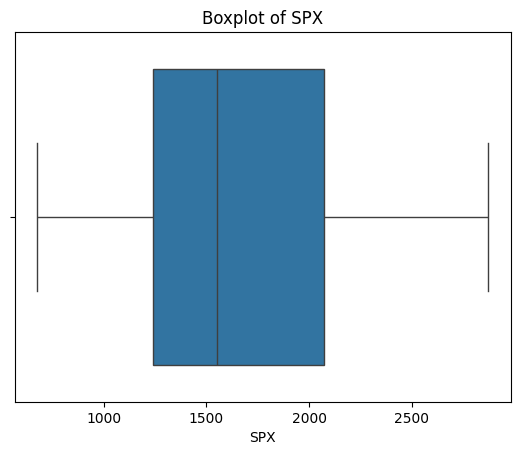

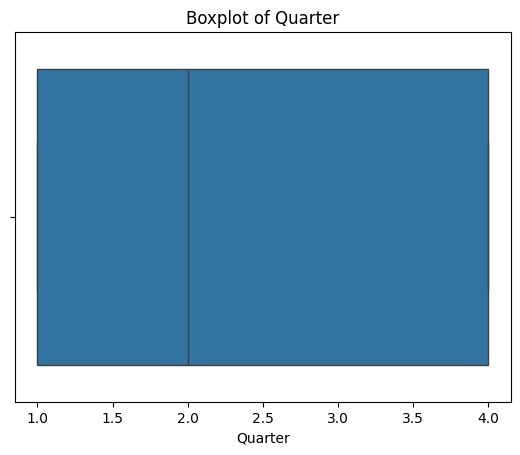

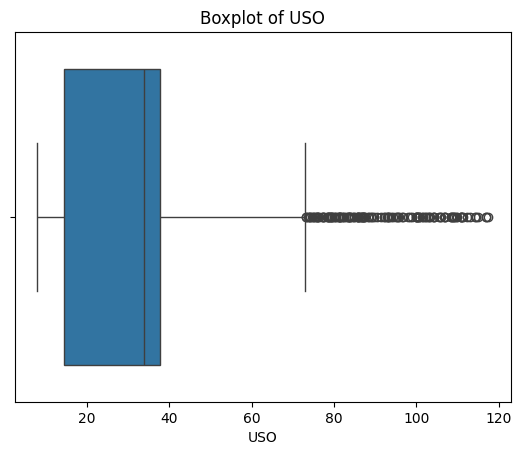

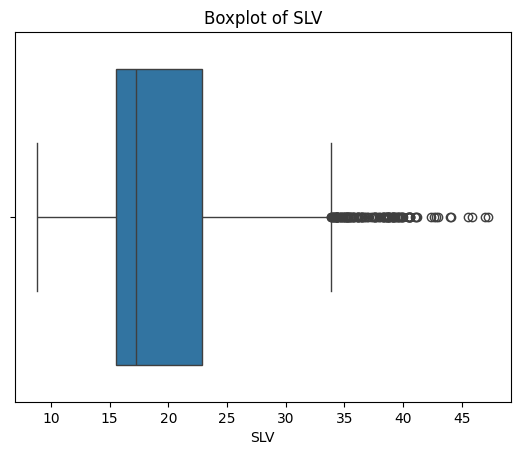

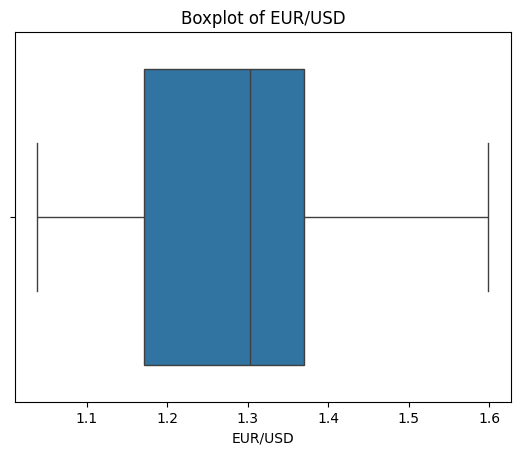

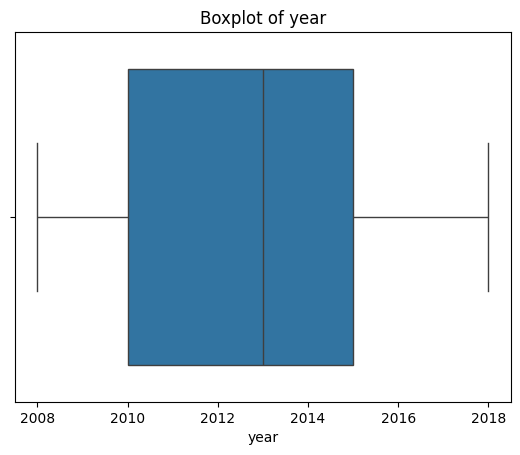

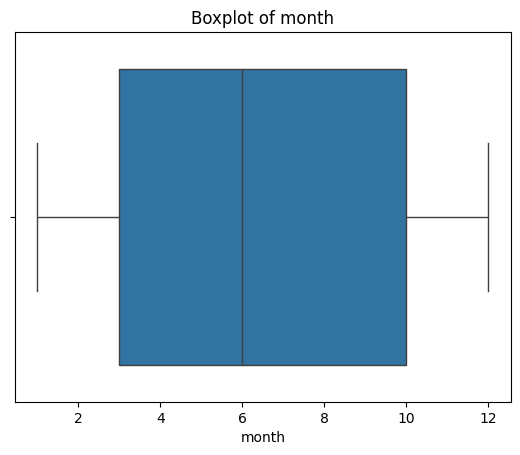

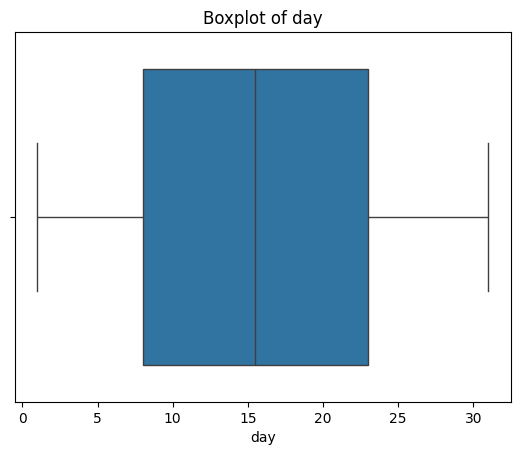

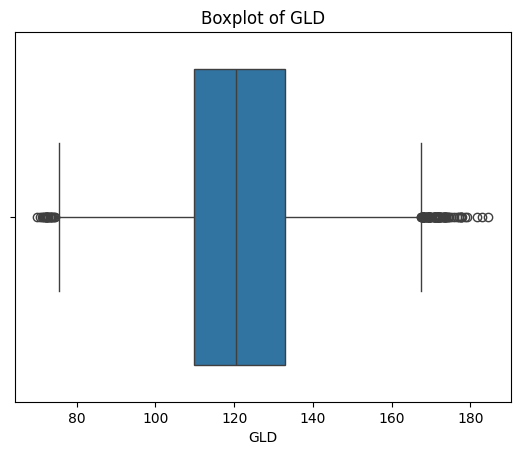

In [16]:

for column in dataset.select_dtypes(include=np.number):
  plt.figure()
  sns.boxplot(x=dataset[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

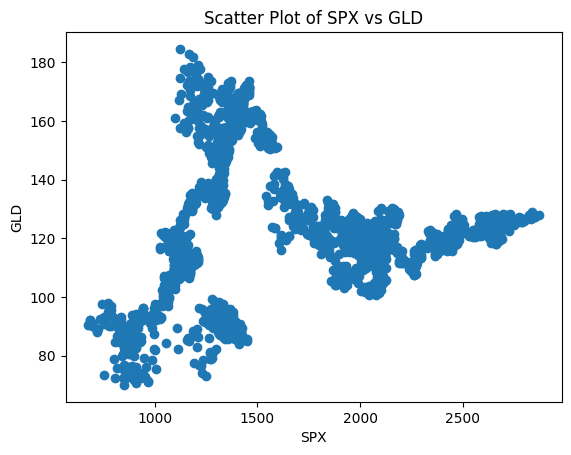

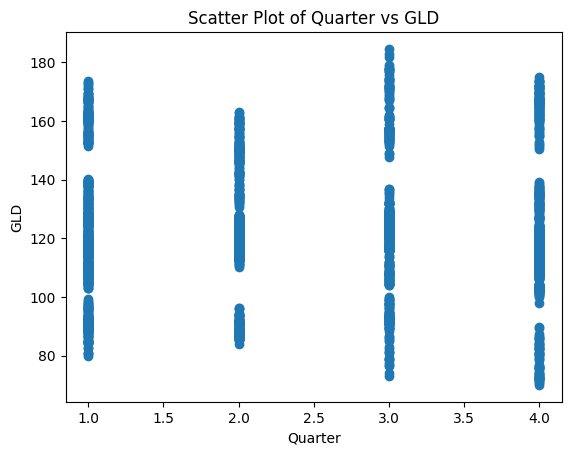

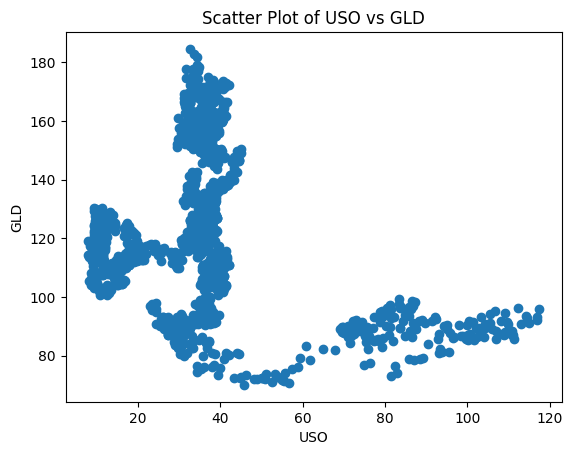

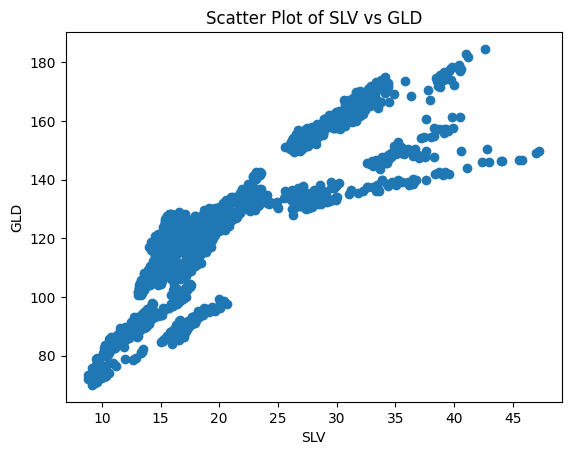

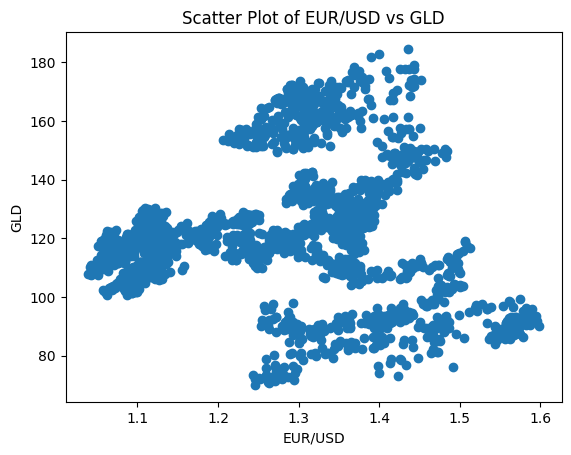

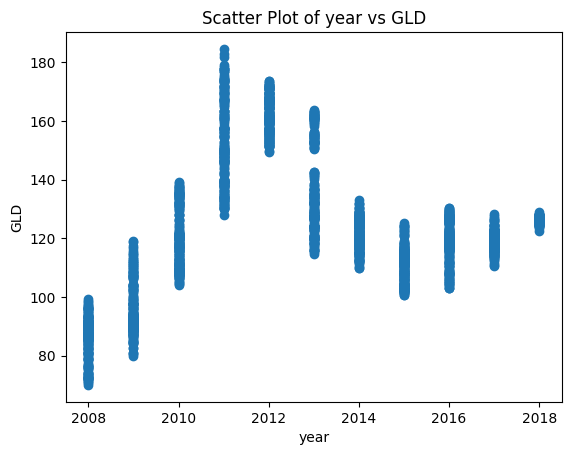

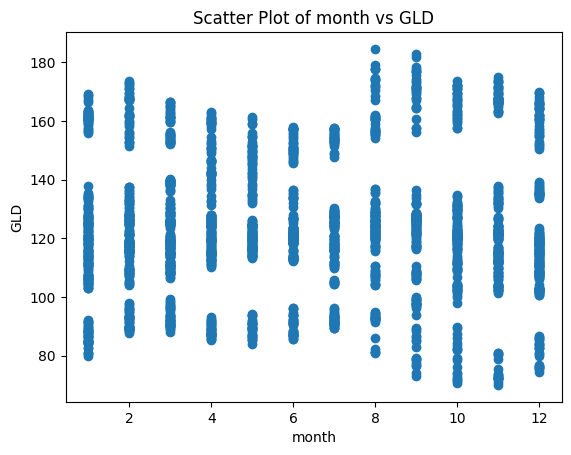

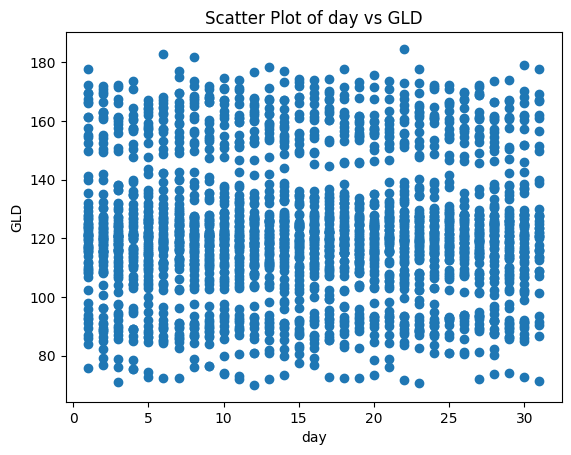

In [17]:
# prompt: scatter plot for all feature vs gld

for column in dataset.select_dtypes(include=np.number):
  if column != 'GLD':
    plt.figure()
    plt.scatter(dataset[column], dataset['GLD'])
    plt.xlabel(column)
    plt.ylabel('GLD')
    plt.title(f'Scatter Plot of {column} vs GLD')
    plt.show()

In [18]:
dataset.select_dtypes(include ='number').corr()

,SPX,Quarter,USO,SLV,EUR/USD,year,month,day,GLD
SPX,1.000000,-0.022940,-0.591573,-0.274055,-0.672017,0.944403,-0.023432,-0.001525,0.049345
Quarter,-0.022940,1.000000,-0.042558,-0.014634,-0.007448,-0.069312,0.973614,0.011128,0.018193
USO,-0.591573,-0.042558,1.000000,0.167547,0.829317,-0.775765,-0.047335,-0.007988,-0.186360
SLV,-0.274055,-0.014634,0.167547,1.000000,0.321631,-0.172485,-0.011976,-0.000206,0.866632
EUR/USD,-0.672017,-0.007448,0.829317,0.321631,1.000000,-0.791655,-0.012100,0.002122,-0.024375
year,0.944403,-0.069312,-0.775765,-0.172485,-0.791655,1.000000,-0.070903,-0.006307,0.206654
month,-0.023432,0.973614,-0.047335,-0.011976,-0.012100,-0.070903,1.000000,0.005550,0.020494
day,-0.001525,0.011128,-0.007988,-0.000206,0.002122,-0.006307,0.005550,1.000000,-0.000198
GLD,0.049345,0.018193,-0.186360,0.866632,-0.024375,0.206654,0.020494,-0.000198,1.000000


<Axes: >

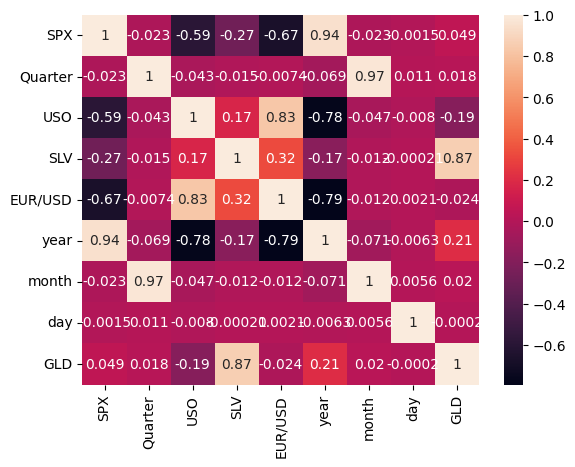

In [19]:
sns.heatmap(dataset.select_dtypes(include ='number').corr(), annot=True)

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(X)
print(X.shape)

[[1.44716003e+03 1.00000000e+00 7.84700010e+01 ... 2.00800000e+03
  1.00000000e+00 2.00000000e+00]
 [1.44716003e+03 1.00000000e+00 7.83700030e+01 ... 2.00800000e+03
  1.00000000e+00 3.00000000e+00]
 [1.41163000e+03 1.00000000e+00 7.73099980e+01 ... 2.00800000e+03
  1.00000000e+00 4.00000000e+00]
 ...
 [2.72307007e+03 2.00000000e+00 1.44100000e+01 ... 2.01800000e+03
  5.00000000e+00 1.00000000e+01]
 [2.73012988e+03 2.00000000e+00 1.43800000e+01 ... 2.01800000e+03
  5.00000000e+00 1.40000000e+01]
 [2.72578003e+03 2.00000000e+00 1.44058000e+01 ... 2.01800000e+03
  5.00000000e+00 1.60000000e+01]]
(2290, 8)


In [22]:
print(y)
print(y.shape)

[ 84.860001  85.57      85.129997 ... 125.18     124.489998 122.5438  ]
(2290,)


# **DATASET SPLITING INTO TRAIN AND TEST**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
print(X_train)
print(X_train.shape)

[[2.64805005e+03 2.00000000e+00 1.38000000e+01 ... 2.01800000e+03
  4.00000000e+00 3.00000000e+01]
 [2.04596997e+03 4.00000000e+00 1.33500000e+01 ... 2.01500000e+03
  1.10000000e+01 1.20000000e+01]
 [1.10234998e+03 4.00000000e+00 3.57300000e+01 ... 2.00900000e+03
  1.20000000e+01 1.00000000e+01]
 ...
 [1.46242004e+03 1.00000000e+00 3.38200000e+01 ... 2.01300000e+03
  1.00000000e+00 2.00000000e+00]
 [8.27159973e+02 1.00000000e+00 2.69100000e+01 ... 2.00900000e+03
  2.00000000e+00 1.00000000e+01]
 [1.37751001e+03 4.00000000e+00 3.12999990e+01 ... 2.01200000e+03
  1.10000000e+01 8.00000000e+00]]
(1832, 8)


In [25]:
print(y_train)
print(y_train.shape)

[124.589996 103.849998 110.82     ... 163.169998  90.209999 167.990005]
(1832,)


In [26]:
print(X_test)
print(X_test.shape)

[[2.25695996e+03 4.00000000e+00 1.16200000e+01 ... 2.01600000e+03
  1.20000000e+01 1.20000000e+01]
 [1.59337000e+03 2.00000000e+00 3.34599990e+01 ... 2.01300000e+03
  4.00000000e+00 1.10000000e+01]
 [1.32721997e+03 1.00000000e+00 3.91899990e+01 ... 2.01100000e+03
  2.00000000e+00 2.80000000e+01]
 ...
 [1.76210999e+03 4.00000000e+00 3.55499990e+01 ... 2.01300000e+03
  1.00000000e+01 2.80000000e+01]
 [1.40875000e+03 4.00000000e+00 3.16299990e+01 ... 2.01200000e+03
  1.00000000e+01 2.40000000e+01]
 [2.02721997e+03 1.00000000e+00 1.01800000e+01 ... 2.01600000e+03
  3.00000000e+00 1.60000000e+01]]
(458, 8)


In [27]:
print(y_test)
print(y_test.shape)


[110.82     151.050003 137.660004 113.07     114.629997  96.18
 110.459999  95.120003 121.25     126.800003 146.380005 122.470001
 116.629997  87.75      95.989998  92.730003 115.690002  89.18
 124.980003 115.029999 120.739998 151.619995 122.900002 120.260002
 171.720001 109.129997 119.529999  87.419998  88.25      90.610001
 121.309998 154.190002 151.440002 128.229996 126.720001  90.800003
 167.320007 120.959999 105.900002 143.809998  92.290001 127.589996
 116.75     152.149994 118.970001  89.519997  76.199997 120.139999
 131.660004 118.989998 128.199997 165.800003 155.669998  92.059998
 147.630005 150.75     114.290001 111.540001  87.379997 127.959999
 124.769997 151.619995 113.639999 110.879997 161.539993 119.779999
 107.519997 129.869995 131.679993 125.980003 115.480003 150.410004
 155.360001 168.710007 110.739998 141.630005 102.269997 113.75
 119.290001 123.419998 118.190002  93.709999 140.380005 106.980003
 124.75      92.059998 131.919998 126.410004 127.459999 126.339996
 113.32

In [28]:
x_test_dataframe = pd.DataFrame(X_test ,columns=['SPX', 'Quarter', 'USO', 'SLV', 'EUR/USD', 'year', 'month', 'day'])
x_test_dataframe

,SPX,Quarter,USO,SLV,EUR/USD,year,month,day
0,2256.959961,4.0,11.620000,16.190001,1.054741,2016.0,12.0,12.0
1,1593.369995,2.0,33.459999,26.700001,1.311475,2013.0,4.0,11.0
2,1327.219971,1.0,39.189999,33.110001,1.373438,2011.0,2.0,28.0
3,2057.639893,2.0,19.510000,15.030000,1.122297,2015.0,6.0,29.0
4,1183.709961,2.0,39.369999,17.879999,1.321283,2010.0,4.0,27.0
...,...,...,...,...,...,...,...,...
453,2060.310059,4.0,23.910000,15.710000,1.229407,2014.0,12.0,8.0
454,1052.630005,3.0,36.700001,16.780001,1.471194,2009.0,9.0,15.0
455,1762.109985,4.0,35.549999,21.680000,1.380529,2013.0,10.0,28.0
456,1408.750000,4.0,31.629999,30.709999,1.296512,2012.0,10.0,24.0


# **MODEL** TRAINING

LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_linearRegression = regressor.predict(X_test)


score_linearRegression = r2_score(y_test,y_pred_linearRegression)

from sklearn.metrics import r2_score
print(f"R2 score for linear Regression is : {r2_score(y_test,y_pred_linearRegression)}")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_linearRegression)
print("Mean Absolute Error:", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_linearRegression)
print("Mean Squared Error:", mse)

R2 score for linear Regression is : 0.9022654217110881
Mean Absolute Error: 5.4374019505118545
Mean Squared Error: 51.57945951245474


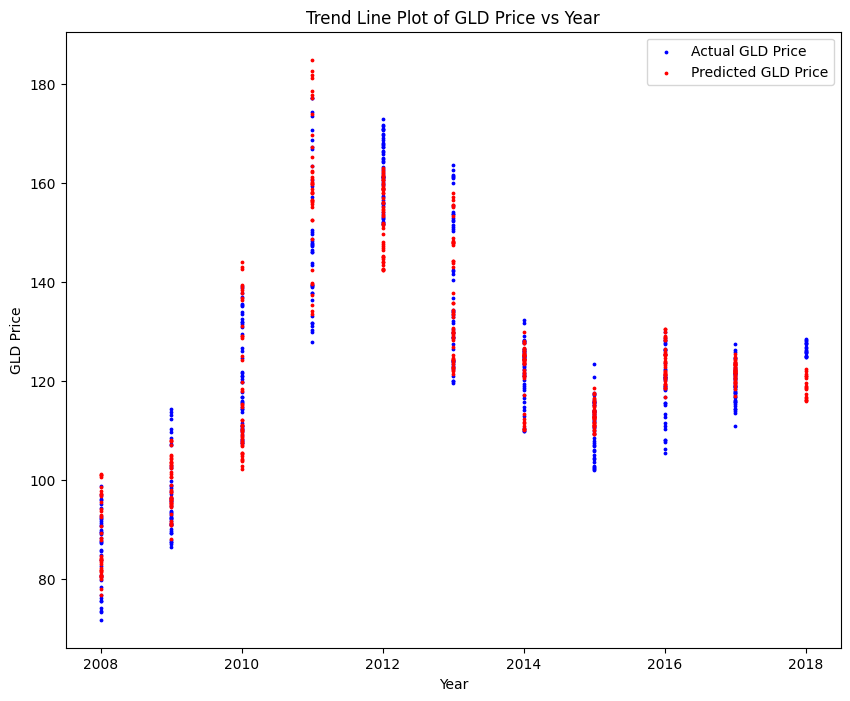

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test_dataframe['year'], y_test, color='blue', s= 3, label='Actual GLD Price')
plt.scatter(x_test_dataframe['year'], y_pred_linearRegression, color='red',s=3 , label='Predicted GLD Price')
plt.xlabel('Year')
plt.ylabel('GLD Price')
plt.title('Trend Line Plot of GLD Price vs Year')
plt.legend()
plt.show()

In [31]:
print(np.concatenate((y_pred_linearRegression.reshape(len(y_pred_linearRegression),1), y_test.reshape(len(y_test),1)),1))

[[121.26328958 110.82      ]
 [144.19277569 151.050003  ]
 [152.58439383 137.660004  ]
 [113.3009915  113.07      ]
 [107.08383625 114.629997  ]
 [ 95.46509952  96.18      ]
 [110.21091667 110.459999  ]
 [100.8899246   95.120003  ]
 [123.2678113  121.25      ]
 [116.03398786 126.800003  ]
 [184.89112034 146.380005  ]
 [125.19862624 122.470001  ]
 [108.33621542 116.629997  ]
 [ 91.69532494  87.75      ]
 [ 96.73661645  95.989998  ]
 [ 90.7154294   92.730003  ]
 [113.99562445 115.690002  ]
 [ 90.80454246  89.18      ]
 [121.90948401 124.980003  ]
 [111.40100168 115.029999  ]
 [125.21354824 120.739998  ]
 [144.97481041 151.619995  ]
 [123.73670148 122.900002  ]
 [123.57350422 120.260002  ]
 [162.41796051 171.720001  ]
 [104.26427353 109.129997  ]
 [124.4691838  119.529999  ]
 [ 94.14742076  87.419998  ]
 [ 80.61394512  88.25      ]
 [ 97.07404075  90.610001  ]
 [121.04497933 121.309998  ]
 [148.87700097 154.190002  ]
 [148.3530978  151.440002  ]
 [119.62196823 128.229996  ]
 [119.713684  

POLYNOMIAL REGRESSION

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred_polynomialRegression = lin_reg_2.predict(poly_reg.transform(X_test))
score_polynomialRegression=r2_score(y_test,y_pred_polynomialRegression)
score_polynomialRegression

0.9859098821687606

In [33]:
print(np.concatenate((y_pred_polynomialRegression.reshape(len(y_pred_polynomialRegression),1), y_test.reshape(len(y_test),1)),1))

[[110.33258353 110.82      ]
 [148.14556074 151.050003  ]
 [138.6451189  137.660004  ]
 [113.86049626 113.07      ]
 [113.65757326 114.629997  ]
 [ 94.69918904  96.18      ]
 [110.06747797 110.459999  ]
 [ 92.35848195  95.120003  ]
 [121.47690109 121.25      ]
 [128.23581019 126.800003  ]
 [146.25890717 146.380005  ]
 [124.04877043 122.470001  ]
 [115.12747185 116.629997  ]
 [ 88.06900073  87.75      ]
 [ 94.51216411  95.989998  ]
 [ 91.88245526  92.730003  ]
 [114.92385945 115.690002  ]
 [ 89.91190146  89.18      ]
 [123.55700255 124.980003  ]
 [110.61386621 115.029999  ]
 [117.39527442 120.739998  ]
 [158.9918039  151.619995  ]
 [125.08986235 122.900002  ]
 [124.88360964 120.260002  ]
 [163.81675889 171.720001  ]
 [105.67930179 109.129997  ]
 [123.42114712 119.529999  ]
 [ 87.12277461  87.419998  ]
 [ 85.80071262  88.25      ]
 [ 89.62602117  90.610001  ]
 [123.14536473 121.309998  ]
 [153.18383692 154.190002  ]
 [152.56025633 151.440002  ]
 [127.00452141 128.229996  ]
 [122.77878032

In [34]:
from sklearn.metrics import mean_absolute_error
mae_p = mean_absolute_error(y_test, y_pred_polynomialRegression)
print("Mean Absolute Error:", mae_p)

from sklearn.metrics import mean_squared_error
mse_p = mean_squared_error(y_test, y_pred_polynomialRegression)
print("Mean Squared Error:", mse_p)

Mean Absolute Error: 2.1417461930347415
Mean Squared Error: 7.436064849574132


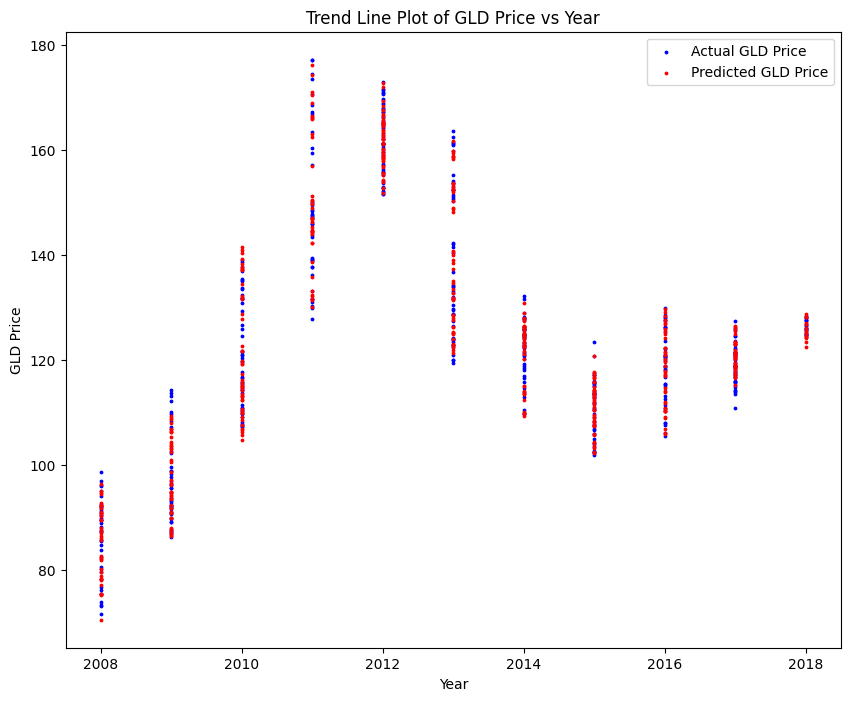

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test_dataframe['year'], y_test, color='blue', s= 3, label='Actual GLD Price')
plt.scatter(x_test_dataframe['year'], y_pred_polynomialRegression, color='red',s=3 , label='Predicted GLD Price')
plt.xlabel('Year')
plt.ylabel('GLD Price')
plt.title('Trend Line Plot of GLD Price vs Year')
plt.legend()
plt.show()

SUPPORT VECTOR REGRESSION

In [37]:
#Support Vector Regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train_scaled = sc.fit_transform(y_train.reshape(-1,1))
y_test_scaled = sc.transform(y_test.reshape(-1,1))

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred_svr = sc.inverse_transform(y_pred_scaled.reshape(-1,1))
score_SVR=r2_score(y_test,y_pred_svr)
score_SVR


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9866965157130277

In [39]:
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[112.49191541 110.82      ]
 [151.27978698 151.050003  ]
 [143.52615213 137.660004  ]
 [113.1536428  113.07      ]
 [112.64348244 114.629997  ]
 [ 94.7602873   96.18      ]
 [110.50029272 110.459999  ]
 [ 92.30475771  95.120003  ]
 [122.28609937 121.25      ]
 [124.99873341 126.800003  ]
 [147.01475193 146.380005  ]
 [123.80965076 122.470001  ]
 [116.90923569 116.629997  ]
 [ 89.49506953  87.75      ]
 [ 93.97948729  95.989998  ]
 [ 93.4382394   92.730003  ]
 [117.35409155 115.690002  ]
 [ 89.15718885  89.18      ]
 [124.98253184 124.980003  ]
 [113.13625227 115.029999  ]
 [118.64728333 120.739998  ]
 [154.04304955 151.619995  ]
 [122.08042769 122.900002  ]
 [121.9928963  120.260002  ]
 [170.40099944 171.720001  ]
 [106.30038295 109.129997  ]
 [121.483171   119.529999  ]
 [ 90.10892619  87.419998  ]
 [ 88.10154628  88.25      ]
 [ 91.37694087  90.610001  ]
 [122.07401082 121.309998  ]
 [157.49328957 154.190002  ]
 [152.30279446 151.440002  ]
 [126.96465843 128.229996  ]
 [124.81835094

In [40]:
from sklearn.metrics import r2_score
print(f"R2 score for Support Vector Regression is : {r2_score(y_test,y_pred_svr)}")

from sklearn.metrics import mean_absolute_error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error:", mae_svr)

from sklearn.metrics import mean_squared_error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mse_svr)

R2 score for Support Vector Regression is : 0.9866965157130277
Mean Absolute Error: 1.9492870849208919
Mean Squared Error: 7.020918708279832


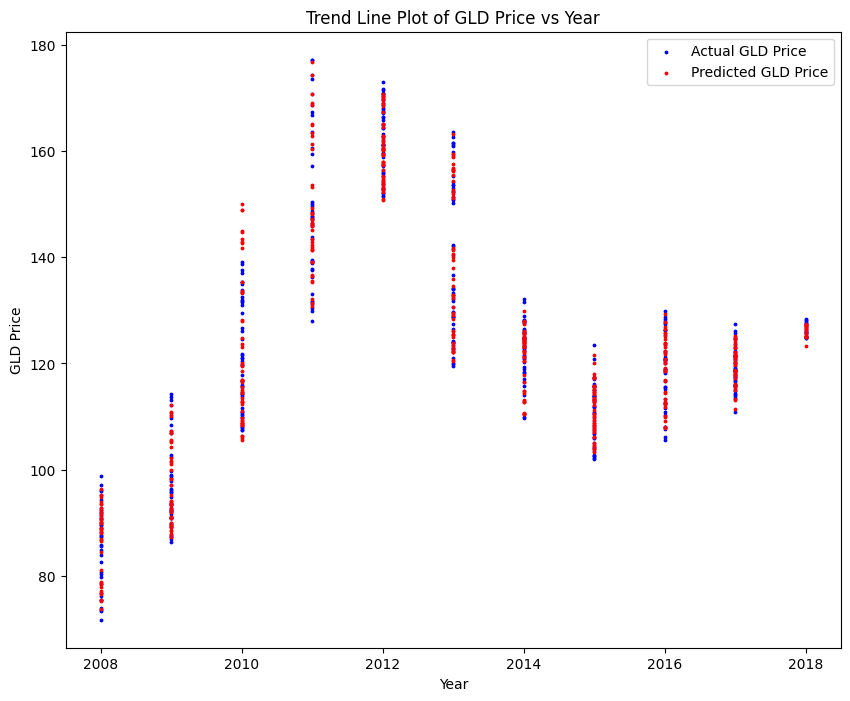

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test_dataframe['year'], y_test, color='blue', s= 3, label='Actual GLD Price')
plt.scatter(x_test_dataframe['year'], y_pred_svr, color='red',s=3 , label='Predicted GLD Price')
plt.xlabel('Year')
plt.ylabel('GLD Price')
plt.title('Trend Line Plot of GLD Price vs Year')
plt.legend()
plt.show()

DECISION TREE

In [42]:
#decision tree
from datetime import datetime
now = datetime.now()
quarter = (now.month - 1) // 3 + 1
year = now.year
month = now.month
day = now.day

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 6)
regressor.fit(X_train, y_train)
y_pred_decisionTree = regressor.predict(X_test)

score_decisionTree=r2_score(y_test,y_pred_decisionTree)
score_decisionTree


0.9930344569610723

In [43]:
print(np.concatenate((y_pred_decisionTree.reshape(len(y_pred_decisionTree),1), y_test.reshape(len(y_test),1)),1))

[[110.400002 110.82    ]
 [142.770004 151.050003]
 [137.509995 137.660004]
 [114.660004 113.07    ]
 [114.309998 114.629997]
 [ 95.18      96.18    ]
 [111.669998 110.459999]
 [ 93.169998  95.120003]
 [120.839996 121.25    ]
 [127.279999 126.800003]
 [146.740005 146.380005]
 [120.959999 122.470001]
 [118.360001 116.629997]
 [ 88.139999  87.75    ]
 [ 96.5       95.989998]
 [ 92.739998  92.730003]
 [116.080002 115.690002]
 [ 88.839996  89.18    ]
 [125.18     124.980003]
 [114.720001 115.029999]
 [120.25     120.739998]
 [149.740005 151.619995]
 [122.949997 122.900002]
 [119.889999 120.260002]
 [173.960007 171.720001]
 [108.349998 109.129997]
 [118.470001 119.529999]
 [ 88.419998  87.419998]
 [ 88.580002  88.25    ]
 [ 87.089996  90.610001]
 [122.209999 121.309998]
 [156.080002 154.190002]
 [152.619995 151.440002]
 [126.300003 128.229996]
 [127.660004 126.720001]
 [ 91.099998  90.800003]
 [169.399994 167.320007]
 [121.360001 120.959999]
 [106.220001 105.900002]
 [142.639999 143.809998]


In [44]:
from sklearn.metrics import r2_score
print(f"R2 score for decision tree is : {r2_score(y_test,y_pred_decisionTree)}")

from sklearn.metrics import mean_absolute_error
mae_dt = mean_absolute_error(y_test, y_pred_decisionTree)
print("Mean Absolute Error:", mae_dt)

from sklearn.metrics import mean_squared_error
mse_dt = mean_squared_error(y_test, y_pred_decisionTree)
print("Mean Squared Error:", mse_dt)

R2 score for decision tree is : 0.9930344569610723
Mean Absolute Error: 1.1269648406113537
Mean Squared Error: 3.6760678917196605


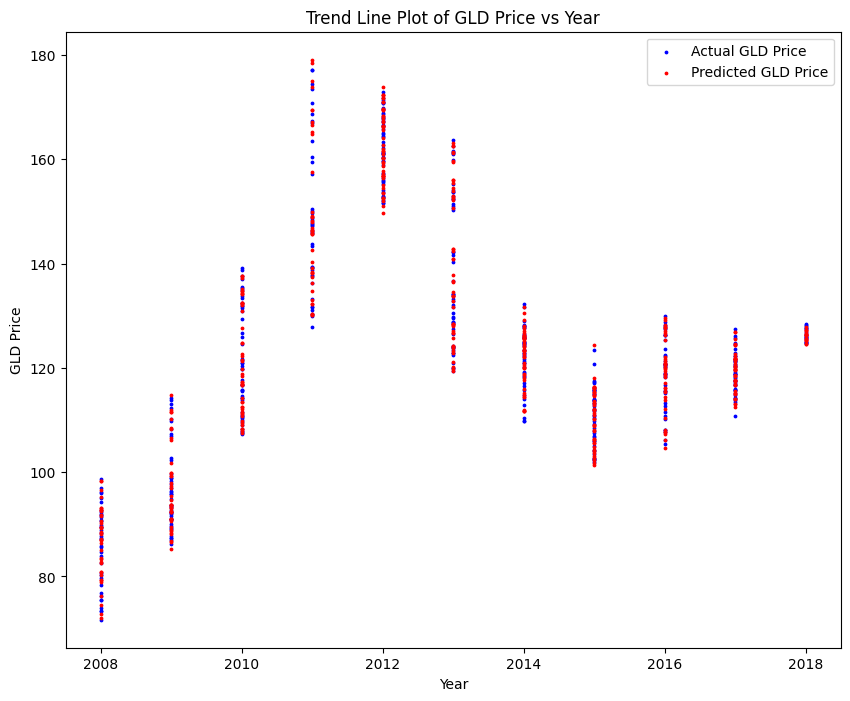

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test_dataframe['year'], y_test, color='blue', s= 3, label='Actual GLD Price')
plt.scatter(x_test_dataframe['year'], y_pred_decisionTree, color='red',s=3 , label='Predicted GLD Price')
plt.xlabel('Year')
plt.ylabel('GLD Price')
plt.title('Trend Line Plot of GLD Price vs Year')
plt.legend()
plt.show()

RANDOM FORREST

In [46]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred_randomForest = regressor.predict(X_test)
score_randomForest=r2_score(y_test,y_pred_randomForest)
score_randomForest


0.9958210338044813

In [47]:
print(np.concatenate((y_pred_randomForest.reshape(len(y_pred_randomForest),1), y_test.reshape(len(y_test),1)),1))

[[111.1209992 110.82     ]
 [146.2450043 151.050003 ]
 [136.9230011 137.660004 ]
 [112.8070016 113.07     ]
 [112.6129992 114.629997 ]
 [ 95.5959991  96.18     ]
 [111.1720002 110.459999 ]
 [ 93.3979997  95.120003 ]
 [119.7090004 121.25     ]
 [127.0319983 126.800003 ]
 [147.2489974 146.380005 ]
 [121.7159981 122.470001 ]
 [118.8659995 116.629997 ]
 [ 88.4040001  87.75     ]
 [ 96.157      95.989998 ]
 [ 92.9929985  92.730003 ]
 [117.2360009 115.690002 ]
 [ 88.8179991  89.18     ]
 [125.347001  124.980003 ]
 [115.3620008 115.029999 ]
 [120.297999  120.739998 ]
 [151.9440033 151.619995 ]
 [122.949997  122.900002 ]
 [119.7910004 120.260002 ]
 [173.0370027 171.720001 ]
 [109.5899985 109.129997 ]
 [119.3760009 119.529999 ]
 [ 87.388999   87.419998 ]
 [ 87.3339997  88.25     ]
 [ 88.2549987  90.610001 ]
 [122.3100006 121.309998 ]
 [154.3460006 154.190002 ]
 [150.136998  151.440002 ]
 [125.9800003 128.229996 ]
 [127.4669976 126.720001 ]
 [ 91.7549987  90.800003 ]
 [161.2330001 167.320007 ]
 

In [48]:
from sklearn.metrics import r2_score
print(f"R2 score for Random Forest is : {r2_score(y_test,y_pred_randomForest)}")

from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, y_pred_randomForest)
print("Mean Absolute Error:", mae_rf)

from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, y_pred_randomForest)
print("Mean Squared Error:", mse_rf)

R2 score for Random Forest is : 0.9958210338044813
Mean Absolute Error: 0.9711789792576416
Mean Squared Error: 2.2054509413085444


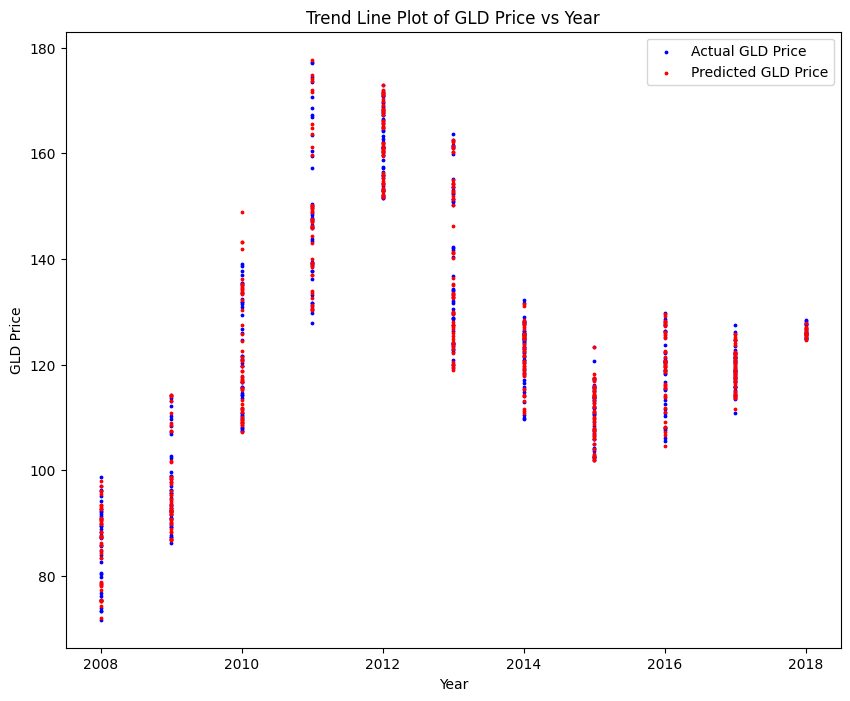

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test_dataframe['year'], y_test, color='blue', s= 3, label='Actual GLD Price')
plt.scatter(x_test_dataframe['year'], y_pred_randomForest, color='red',s=3 , label='Predicted GLD Price')
plt.xlabel('Year')
plt.ylabel('GLD Price')
plt.title('Trend Line Plot of GLD Price vs Year')
plt.legend()
plt.show()

In [53]:
print(score_linearRegression)
print(score_polynomialRegression)
print(score_SVR)
print(score_decisionTree)
print(score_randomForest)

0.9022654217110881
0.9859098821687606
0.9866965157130277
0.9930344569610723
0.9958210338044813


In [54]:
from sklearn.model_selection import KFold, cross_val_score
def cross_validation(modelClass, *args, **kwargs):
    model = modelClass(*args, **kwargs)
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"Cross-Validation R² Scores for {modelClass}:", scores)
    print(f"Mean R² Score for {modelClass}:", np.mean(scores))

In [55]:
cross_validation(LinearRegression)
cross_validation(RandomForestRegressor, n_estimators=10, random_state=0)
cross_validation(DecisionTreeRegressor)
cross_validation(SVR)

Cross-Validation R² Scores for <class 'sklearn.linear_model._base.LinearRegression'>: [0.90226542 0.91480808 0.91834472 0.91831946 0.89027882]
Mean R² Score for <class 'sklearn.linear_model._base.LinearRegression'>: 0.9088033001876108
Cross-Validation R² Scores for <class 'sklearn.ensemble._forest.RandomForestRegressor'>: [0.99630387 0.99183746 0.99564566 0.9957368  0.9947687 ]
Mean R² Score for <class 'sklearn.ensemble._forest.RandomForestRegressor'>: 0.9948584987263652
Cross-Validation R² Scores for <class 'sklearn.tree._classes.DecisionTreeRegressor'>: [0.99332717 0.98991412 0.99045271 0.99475451 0.99357697]
Mean R² Score for <class 'sklearn.tree._classes.DecisionTreeRegressor'>: 0.9924050972833525
Cross-Validation R² Scores for <class 'sklearn.svm._classes.SVR'>: [-0.00125846  0.02375955  0.04022492  0.03032854 -0.02053593]
Mean R² Score for <class 'sklearn.svm._classes.SVR'>: 0.014503723557572235


In [56]:
output_list = [[score_linearRegression , mae , mse ] ,
               [score_polynomialRegression , mae_p ,mse_p],
               [score_SVR , mae_svr , mse_svr],
               [score_decisionTree ,mae_dt ,mse_dt],
               [score_randomForest , mae_rf , mse_rf]]
output_dataframe = pd.DataFrame(output_list, columns=['R2_score', 'MAE', 'MSE'])
output_dataframe.index = ['Linear Regression', 'Polynomial Regression', 'SVR', 'Decision Tree', 'Random Forest']
output_dataframe

,R2_score,MAE,MSE
Linear Regression,0.902265,5.437402,51.579460
Polynomial Regression,0.985910,2.141746,7.436065
SVR,0.986697,1.949287,7.020919
Decision Tree,0.993034,1.126965,3.676068
Random Forest,0.995821,0.971179,2.205451


R² Score: Indicates the proportion of variance explained by the model. The Random Forest model has the highest R² score (0.995821), explaining about 99.58% of the variance in gold prices, with all models above 0.90 indicating strong performance.

Mean Absolute Error (MAE): Measures the average prediction error without direction. The Random Forest model has the lowest MAE (0.971179), indicating its predictions are, on average, only $0.97 away from actual values.

Mean Squared Error (MSE): Penalizes larger errors more heavily. The Random Forest model has the lowest MSE (2.205451), showing fewer large errors compared to other models.

In [57]:
print("Model with best performing score is Random Forest")

Model with best performing score is Random Forest
